In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [4]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print(X_train.shape)

(60000, 28, 28)


In [6]:
print(X_test.shape)

(10000, 28, 28)


In [7]:
print(y_train.shape[0])

60000


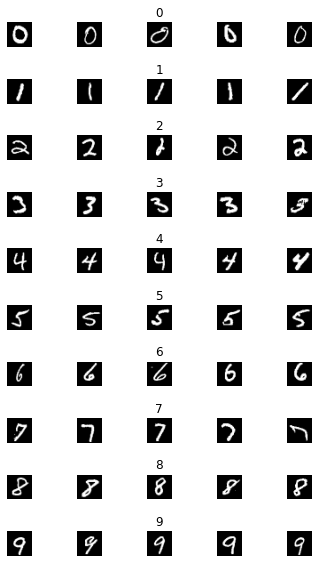

In [9]:
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

In [10]:
print(num_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

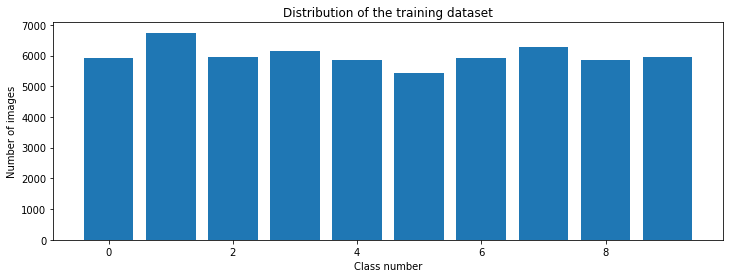

In [11]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255 
X_test = X_test/255

In [13]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [14]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.6067 - accuracy: 0.8125 - val_loss: 0.2967 - val_accuracy: 0.9110
Epoch 2/10
54000/54000 [==============================] - 1s 24us/step - loss: 0.3541 - accuracy: 0.8965 - val_loss: 0.2755 - val_accuracy: 0.9185
Epoch 3/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.3066 - accuracy: 0.9099 - val_loss: 0.2559 - val_accuracy: 0.9242
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2938 - accuracy: 0.9128 - val_loss: 0.2395 - val_accuracy: 0.9302
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2768 - accuracy: 0.9192 - val_loss: 0.2298 - val_accuracy: 0.9328
Epoch 6/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.2675 - accuracy: 0.9215 - val_loss: 0.2196 - val_accuracy: 0.9327
Epoch 7/10
54000/54000 [==============================] - 1s 24us/ste

Text(0.5, 0, 'epoch')

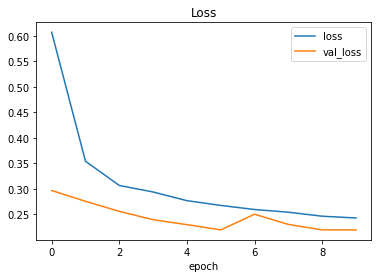

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

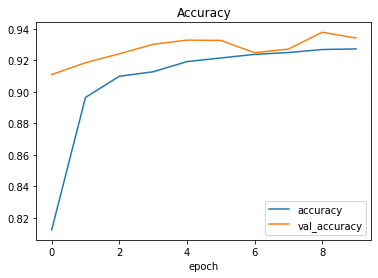

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2535121162623167
Test accuracy: 0.928600013256073


In [23]:
import requests
from PIL import Image

In [24]:
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'

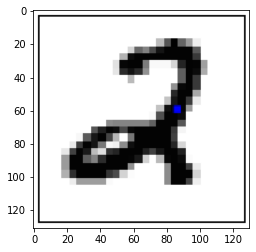

In [29]:
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

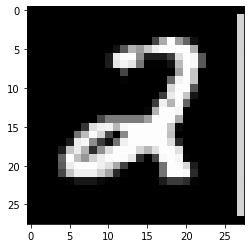

In [30]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [31]:
img = img/255
img = img.reshape(1, 784)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]
